# Scientific notebook demo

## Intro to Bayesian Networks

### Random Variables

Random Variables are simply variables whose values are uncertain. Eg -

1. In case of flipping a coin $n$ times, a random variable $X$ can be number of heads shown up.

2. In COVID-19 pandemic situation, random variable can be number of patients found positive with virus daily.

### Probability Distributions

Probability Distributions governs the amount of uncertainty of random variables. They have a math function with which they assign probabilities to different values taken by random variables. The associated math function is called probability density function (pdf). For simplicity, let's denote any random variable as $X$ and its corresponding pdf as $P\left (X\right )$. Eg - Following figure shows the probability distribution for number of heads when an unbiased coin is flipped 5 times.

### Bayesian Networks

Bayesian Networks are graph based representations to acccount for randomness while modelling our data. The nodes of the graph are random variables and the connections between nodes denote the direct influence from parent to child.

### Bayesian Network Example


Let's say a student is taking a class during school. The `difficulty` of the class and the `intelligence` of the student together directly influence student's `grades`. And the `grades` affects his/her acceptance to the university. Also, the `intelligence` factor influences student's `SAT` score. Keep this example in mind.

More formally, Bayesian Networks represent joint probability distribution over all the nodes of graph -
$P\left (X_1, X_2, X_3, ..., X_n\right )$ or $P\left (\bigcap_{i=1}^{n}X_i\right )$ where $X_i$ is a random variable. Also Bayesian Networks follow local Markov property by which every node in the graph is independent on its **non-descendants** given its **parents**. In this way, the joint probability distribution can be decomposed as -

$$
P\left (X_1, X_2, X_3, ..., X_n\right ) = \prod_{i=1}^{n} P\left (X_i | Par\left (X_i\right )\right )
$$

<details class="tip">
    <summary>Extra: Proof of decomposition</summary>
    <p><br>First, let's recall conditional probability,<br>
    $$P\left (A|B\right ) = \frac{P\left (A, B\right )}{P\left (B\right )}$$
    The above equation is so derived because of reduction of sample space of $A$ when $B$ has already occured.
    Now, adjusting terms -<br>
    $$P\left (A, B\right ) = P\left (A|B\right )*P\left (B\right )$$
    This equation is called chain rule of probability. Let's generalize this rule for Bayesian Networks. The ordering of names of nodes is such that parent(s) of nodes lie above them (Breadth First Ordering).<br>
    $$P\left (X_1, X_2, X_3, ..., X_n\right ) = P\left (X_n, X_{n-1}, X_{n-2}, ..., X_1\right )\\
    = P\left (X_n|X_{n-1}, X_{n-2}, X_{n-3}, ..., X_1\right ) * P \left (X_{n-1}, X_{n-2}, X_{n-3}, ..., X_1\right ) \left (Chain Rule\right )\\  
    = P\left (X_n|X_{n-1}, X_{n-2}, X_{n-3}, ..., X_1\right ) * P \left (X_{n-1}|X_{n-2}, X_{n-3}, X_{n-4}, ..., X_1\right ) * P \left (X_{n-2}, X_{n-3}, X_{n-4}, ..., X_1\right )$$
    Applying chain rule repeatedly, we get the following equation -<br>
    $$P\left (\bigcap_{i=1}^{n}X_i\right ) = \prod_{i=1}^{n} P\left (X_i | P\left (\bigcap_{j=1}^{i-1}X_j\right )\right )$$
    Keep the above equation in mind. Let's bring back Markov property. To bring some intuition behind Markov property, let's reuse <a href="#bayesian-network-example">Bayesian Network Example</a>. If we say, the student scored very good  <strong>grades</strong>, then it is highly likely the student gets  <strong>acceptance letter </strong> to university. No matter how  <strong>difficult</strong> the class was, how much  <strong>intelligent </strong> the student was, and no matter what his/her  <strong>SAT</strong> score was. The key thing to note here is by  <strong>observing</strong> the node's parent, the influence by  <strong>non-descendants</strong> towards the node gets eliminated. Now, the equation becomes -<br>
    $$P\left (\bigcap_{i=1}^{n}X_i\right ) = \prod_{i=1}^{n} P\left (X_i | Par\left (X_i\right )\right )$$
    Bingo, with the above equation, we have proved  <strong>Factorization Theorem </strong> in Probability.
    </p>
</details>

The decomposition of running [Bayesian Network Example](#bayesian-network-example) can be written as -

$$
P\left (Difficulty, Intelligence, Grade, SAT, Acceptance Letter\right ) = P\left (Difficulty\right )*P\left (Intelligence\right )*\left (Grade|Difficulty, Intelligence\right )*P\left (SAT|Intelligence\right )*P\left (Acceptance Letter|Grade\right )
$$

### Why care about Bayesian Networks

Bayesian Networks allow us to determine the distribution of parameters given the data (Posterior Distribution). The whole idea is to model the underlying data generative process and estimate unobservable quantities. Regarding this, Bayes formula can be written as -

$$
P\left (\theta | D\right ) = \frac{P\left (D|\theta\right ) * P\left (\theta\right )}{P\left (D\right )}
$$

$\theta$ = Parameters of the model

$P\left (\theta\right )$ = Prior Distribution over the parameters

$P\left (D|\theta\right )$ = Likelihood of the data

$P\left (\theta|D\right )$ = Posterior Distribution

$P\left (D\right )$ = Probability of Data. This term is calculated by marginalising out the effect of parameters.

$$
P\left (D\right ) = \int P\left (D, \theta\right ) d\left (\theta\right )\\
P\left (D\right ) = \int P\left (D|\theta\right ) P\left (\theta\right ) d\left (\theta\right )
$$

So, the Bayes formula becomes -

$$
P\left (\theta | D\right ) = \frac{P\left (D|\theta\right ) * P\left (\theta\right )}{\int P\left (D|\theta\right ) P\left (\theta\right ) d\left (\theta\right )}
$$

The devil is in the denominator. The integration over all the parameters is **intractable**. So we resort to sampling and optimization techniques.

## Intro to Variational Inference

### Information

Variational Inference has its origin in Information Theory. So first, let's understand the basic terms - Information and Entropy . Simply, **Information** quantifies how much useful the data is. It is related to Probability Distributions as -

$$
I = -\log \left (P\left (X\right )\right )
$$

The negative sign in the formula has high intuitive meaning. In words, it signifies whenever the probability of certain events is high, the related information is less and vica versa. For example -

1. Consider the statement - It never snows in deserts. The probability of this statement being true is significantly high because we already know that it is hardly possible to snow in deserts. So, the related information is very small.
2. Now consider - There was a snowfall in Sahara Desert in late December 2019. Wow, thats a great news because some unlikely event occured (probability was less). In turn, the information is high.

### Entropy

Entropy quantifies how much **average** Information is present in occurence of events. It is denoted by $H$. It is named Differential Entropy in case of Real Continuous Domain.

$$
H =  E_{P\left (X\right )} \left [-\log\left (P\left (X\right )\right )\right ]\\
H = -\int_X P_X\left (x\right ) \log\left (P_X\left (x\right )\right ) dx
$$

### Entropy of Normal Distribution

As an exercise, let's calculate entropy of Normal Distribution. Let's denote $\mu$ as mean nd $\sigma$ as standard deviation of Normal Distribution. Remember the results, we will need them further.

$$
X \sim Normal\left (\mu, \sigma^2\right )\\
P_X\left (x\right ) = \frac{1}{\sigma \sqrt{2 \pi}} e^{ - \frac{1}{2} \left ({\frac{x- \mu}{ \sigma}}\right )^2}\\
H = -\int_X P_X\left (x\right ) \log\left (P_X\left (x\right )\right ) dx
$$

Only expanding $\log\left (P_X\left (x\right )\right )$ -

$$
H = -\int_X P_X\left (x\right ) \log\left (\frac{1}{\sigma \sqrt{2 \pi}} e^{ - \frac{1}{2} \left ({\frac{x- \mu}{ \sigma}}\right )^2}\right ) dx\\
H = -\frac{1}{2}\int_X P_X\left (x\right ) \log\left (\frac{1}{2 \pi {\sigma}^2}\right )dx  - \int_X P_X\left (x\right ) \log\left (e^{ - \frac{1}{2} \left ({\frac{x- \mu}{ \sigma}}\right )^2}\right ) dx\\
H = \frac{1}{2}\log \left ( 2 \pi {\sigma}^2 \right)\int_X P_X\left (x\right ) dx  + \frac{1}{2{\sigma}^2} \int_X \left ( x-\mu \right)^2 P_X\left (x\right ) dx
$$

Identifying terms -

$$
\int_X P_X\left (x\right ) dx = 1\\
\int_X \left ( x-\mu \right)^2 P_X\left (x\right ) dx = \sigma^2
$$

Substituting back, the entropy becomes -

$$
H = \frac{1}{2}\log \left ( 2 \pi {\sigma}^2 \right) + \frac{1}{2\sigma^2} \sigma^2\\
H = \frac{1}{2}\left ( \log \left ( 2 \pi {\sigma}^2 \right) + 1 \right )
$$

### KL divergence

This mathematical tool serves as the backbone of Variational Inference. Kullback–Leibler (KL) divergence measures the mutual information between two probability distributions. Let's say, we have two probability distributions $P$ and $Q$, then KL divergence quantifies how much similar these distributions are. Mathematically, it is just the difference between entropies of probabilities distributions. In terms of notation, $KL(Q||P)$ represents KL divergence with respect to $Q$ against $P$.

$$
KL(Q||P) = H_P - H_Q\\
= -\int_X P_X\left (x\right ) \log\left (P_X\left (x\right )\right ) dx + \int_X Q_X\left (x\right ) \log\left (Q_X\left (x\right )\right ) dx
$$

Changing $-\int_X P_X\left (x\right ) \log\left (P_X\left (x\right )\right ) dx$ to $-\int_X Q_X\left (x\right ) \log\left (P_X\left (x\right )\right ) dx$ as the KL divergence is with respect to $Q$.

$$
= -\int_X Q_X\left (x\right ) \log\left (P_X\left (x\right )\right ) dx + \int_X Q_X\left (x\right ) \log\left (Q_X\left (x\right )\right ) dx\\
= \int_X Q_X\left (x \right) \log \left( \frac{Q_X\left (x \right)}{P_X\left (x \right)} \right) dx
$$

Remember? We were stuck upon Bayesian Equation because of denominator term but now, we can estimate the posterior distribution $p(\theta|D)$ by another distribution $q(\theta)$ over all the parameters of the model.

$$
KL(q(\theta)||p(\theta|D)) = \int q(\theta) \log \left( \frac{q(\theta)}{p(\theta|D)} \right) d\theta\\
$$

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p>
        If two distributions are similar, then their entropies are similar, implies the KL divergence with respect to two distributions will be smaller. And vica versa. In Variational Inference, the whole idea is to <strong>minimize</strong> KL divergence so that our approximating distribution $q(\theta)$ can be made similar to $p(\theta|D)$.
    </p>
</div>

<details class="tip">
    <summary>Extra: What are latent variables?</summary>
    <p><br>
    If you go about exploring any paper talking about Variational Inference, then most certainly, the papers mention about latent variables instead of parameters. The parameters are fixed quantities for the model whereas latent variables are  <strong>unobserved</strong> quantities of the model conditioned on parameters. Also, we model parameters by probability distributions. For simplicity, let's consider the running terminology of  <strong>parameters </strong> only.
    </p>
</details>

### Evidence Lower Bound

There is again an issue with KL divergence formula as it still involves posterior term i.e. $p(\theta|D)$. Let's get rid of it -

$$
KL(q(\theta)||p(\theta|D)) = \int q(\theta) \log \left( \frac{q(\theta)}{p(\theta|D)} \right) d\theta\\
KL = \int q(\theta) \log \left( \frac{q(\theta) p(D)}{p(\theta, D)} \right) d\theta\\
KL = \int q(\theta) \log \left( \frac{q(\theta)}{p(\theta, D)} \right) d\theta + \int q(\theta) \log \left(p(D) \right) d\theta\\
KL + \int q(\theta) \log \left( \frac{p(\theta, D)}{q(\theta)} \right) d\theta = \log \left(p(D) \right) \int q(\theta) d\theta\\
$$

Identifying terms -

$$
\int q(\theta) d\theta = 1
$$

So, substituting back, our running equation becomes -

$$
KL + \int q(\theta) \log \left( \frac{p(\theta, D)}{q(\theta)} \right) d\theta = \log \left(p(D) \right)
$$

The term $\int q(\theta) \log \left( \frac{p(\theta, D)}{q(\theta)} \right) d\theta$ is called Evidence Lower Bound (ELBO). The right side of the equation $\log \left(p(D) \right)$ is constant.

<div class="admonition note">
    <p class="admonition-title">Observe</p>
    <p>
        <strong>Minimizing</strong> the KL divergence is equivalent to <strong>maximizing</strong> the ELBO. Also, the ELBO does not depend on posterior distribution.
    </p>
</div>

Also,

$$
ELBO = \int q(\theta) \log \left( \frac{p(\theta, D)}{q(\theta)} \right) d\theta\\
ELBO = E_{q(\theta)}\left [\log \left( \frac{p(\theta, D)}{q(\theta)} \right) \right]\\
ELBO = E_{q(\theta)}\left [\log \left(p(\theta, D) \right) \right] + E_{q(\theta)} \left [-\log(q(\theta)) \right]
$$

The term $E_{q(\theta)} \left [-\log(q(\theta)) \right]$ is entropy of $q(\theta)$. Our running equation becomes -

$$
ELBO = E_{q(\theta)}\left [\log \left(p(\theta, D) \right) \right] + H_{q(\theta)}
$$

## Mean Field ADVI

So far, the whole crux of the story is - To approximate the posterior, maximize the ELBO term. ADVI = Automatic Differentiation Variational Inference. I think the term **Automatic Differentiation** deals with maximizing the ELBO (or minimizing the negative ELBO) using any autograd differentiation library. Coming to Mean Field ADVI (MF ADVI), we simply assume that the parameters of approximating distribution $q(\theta)$ are independent and posit Normal distributions over all parameters in **transformed** space to maximize ELBO.

### Transformed Space

To freely optimize ELBO, without caring about matching the **support** of model parameters, we **transform** the support of parameters to Real Coordinate Space. In other words, we optimize ELBO in transformed/unconstrained/unbounded space which automatically maps to minimization of KL divergence in original space. In terms of notation, let's denote a transformation over parameters $\theta$ as $T$ and the transformed parameters as $\zeta$. Mathematically, $\zeta=T(\theta)$. Also, since we are approximating by Normal Distributions, $q(\zeta)$ can be written as -

$$
q(\zeta) = \prod_{i=1}^{k} N(\zeta_k; \mu_k, \sigma^2_k)
$$

Now, the transformed joint probability distribution of the model becomes -

$$
p\left (D, \zeta \right) = p\left (D, T^{-1}\left (\zeta \right) \right) \left | det J_{T^{-1}}(\zeta)  \right |\\
$$

<details class="tip">
    <summary>Extra: Proof of transformation equation</summary>
    <p><br>To simplify notations, let's use $Y=T(X)$ instead of $\zeta=T(\theta)$. After reaching the results, we will put the values back. Also, let's denote cummulative distribution function (cdf) as $F$. There are two cases which respect to properties of function $T$.<br><br><strong>Case 1</strong> - When $T$ is an increasing function $$F_Y(y) = P(Y <= y) = P(T(X) <= y)\\
    = P\left(X <= T^{-1}(y) \right) = F_X\left(T^{-1}(y) \right)\\
    F_Y(y) = F_X\left(T^{-1}(y) \right)$$Let's differentiate with respect to $y$ both sides - $$\frac{\mathrm{d} (F_Y(y))}{\mathrm{d} y} = \frac{\mathrm{d} (F_X\left(T^{-1}(y) \right))}{\mathrm{d} y}\\
    P_Y(y) = P_X\left(T^{-1}(y) \right) \frac{\mathrm{d} (T^{-1}(y))}{\mathrm{d} y}$$<strong>Case 2</strong> - When $T$ is a descreasing function $$F_Y(y) = P(Y <= y) = P(T(X) <= y) = P\left(X >= T^{-1}(y) \right)\\
    = 1-P\left(X < T^{-1}(y) \right) = 1-P\left(X <= T^{-1}(y) \right) = 1-F_X\left(T^{-1}(y) \right)\\
    F_Y(y) = 1-F_X\left(T^{-1}(y) \right)$$Let's differentiate with respect to $y$ both sides - $$\frac{\mathrm{d} (F_Y(y))}{\mathrm{d} y} = \frac{\mathrm{d} (1-F_X\left(T^{-1}(y) \right))}{\mathrm{d} y}\\
    P_Y(y) = (-1) P_X\left(T^{-1}(y) \right) (-1) \frac{\mathrm{d} (T^{-1}(y))}{\mathrm{d} y}\\
    P_Y(y) = P_X\left(T^{-1}(y) \right) \frac{\mathrm{d} (T^{-1}(y))}{\mathrm{d} y}$$Combining both results - $$P_Y(y) = P_X\left(T^{-1}(y) \right) \left | \frac{\mathrm{d} (T^{-1}(y))}{\mathrm{d} y} \right |$$Now comes the role of Jacobians to deal with multivariate parameters $X$ and $Y$. $$J_{T^{-1}}(Y) = \begin{vmatrix}
    \frac{\partial (T_1^{-1})}{\partial y_1} & ... & \frac{\partial (T_1^{-1})}{\partial y_k}\\
    . &  & .\\
    . &  & .\\
    \frac{\partial (T_k^{-1})}{\partial y_1} & ... &\frac{\partial (T_k^{-1})}{\partial y_k}
    \end{vmatrix}$$Concluding - $$P(Y) = P(T^{-1}(Y)) |det J_{T^{-1}}(Y)|\\P(Y) = P(X) |det J_{T^{-1}}(Y)|
    $$Substitute $X$ as $\theta$ and $Y$ as $\zeta$, we will get - $$P(\zeta) = P(T^{-1}(\zeta)) |det J_{T^{-1}}(\zeta)|\\$$
    </p>
</details>
    
### ELBO in transformed Space

Let's bring back the equation formed at [ELBO](#evidence-lower-bound). Expressing ELBO in terms of $\zeta$ -

$$
ELBO = E_{q(\theta)}\left [\log \left(p(\theta, D) \right) \right] + H_{q(\theta)}\\
ELBO = E_{q(\zeta)}\left [\log \left(p\left (D, T^{-1}\left (\zeta \right) \right) \left | det J_{T^{-1}}(\zeta)  \right | \right) \right] + H_{q(\zeta)}
$$

Since, we are optimizing ELBO by factorized Normal Distributions, let's bring back the results of [Entropy of Normal Distribution](#entropy-of-normal-distribution). Our running equation becomes -

$$
ELBO = E_{q(\zeta)}\left [\log \left(p\left (D, T^{-1}\left (\zeta \right) \right) \left | det J_{T^{-1}}(\zeta)  \right | \right) \right] + H_{q(\zeta)}\\
ELBO = E_{q(\zeta)}\left [\log \left(p\left (D, T^{-1}\left (\zeta \right) \right) \left | det J_{T^{-1}}(\zeta)  \right | \right) \right] + \frac{1}{2}\left ( \log \left ( 2 \pi {\sigma}^2 \right) + 1 \right )
$$

<div class="admonition success">
    <p class="admonition-title">Success</p>
    <p>
        The above ELBO equation is the final one which needs to be optimized.
    </p>
</div>
   
### Let's Code

In [1]:
# Imports
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import tensorflow as tf
from scipy.stats import expon, uniform
import arviz as az
import pymc3 as pm
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
from pprint import pprint

plt.style.use("seaborn-darkgrid")

from tensorflow_probability.python.mcmc.transformed_kernel import (
    make_transform_fn, make_transformed_log_prob)

tfb = tfp.bijectors
tfd = tfp.distributions
dtype = tf.float32

In [2]:
# Plot functions
def plot_transformation(theta, zeta, p_theta, p_zeta):
    fig, (const, trans) = plt.subplots(nrows=2, ncols=1, figsize=(6.5, 12))
    const.plot(theta, p_theta, color='blue', lw=2)
    const.set_xlabel(r"$\theta$")
    const.set_ylabel(r"$P(\theta)$")
    const.set_title("Constrained Space")

    trans.plot(zeta, p_zeta, color='blue', lw=2)
    trans.set_xlabel(r"$\zeta$")
    trans.set_ylabel(r"$P(\zeta)$")
    trans.set_title("Transfomed Space");


### Transformed Space Example-1

Transformation of Standard Exponential Distribution

$$
P_X(x) = e^{-x}
$$

The support of Exponential Distribution is $x>=0$. Let's use **log** transformation  to map the support to real number line. Mathematically, $\zeta=\log(\theta)$. Now, let's bring back our transformed joint probability distribution equation -

$$
P(\zeta) = P(T^{-1}(\zeta)) |det J_{T^{-1}}(\zeta)|\\
P(\zeta) = P(e^{\zeta}) * e^{\zeta}
$$

Converting this directly into Python code -

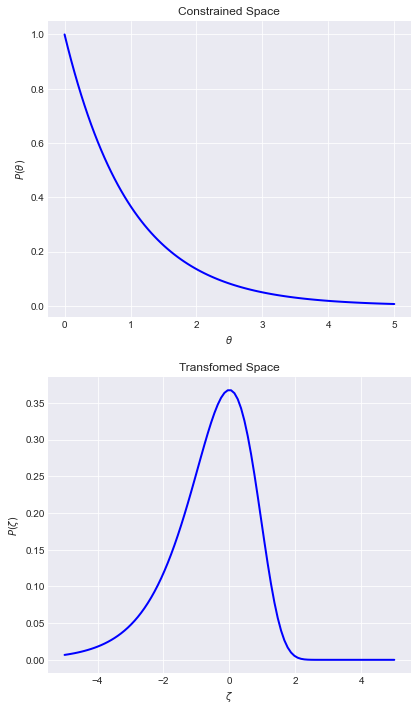

In [3]:
theta = np.linspace(0, 5, 100)
zeta = np.linspace(-5, 5, 100)

dist = expon()
p_theta = dist.pdf(theta)
p_zeta = dist.pdf(np.exp(zeta)) * np.exp(zeta)

plot_transformation(theta, zeta, p_theta, p_zeta)

### Transformed Space Example-2

Transformation of Uniform Distribution (with support $0<=x<=1$)

$$
P_X(x) = 1
$$

Let's use **logit** or **inverse sigmoid** transformation to map the support to real number line. Mathematically, $\zeta=logit(\theta)$.

$$
P(\zeta) = P(T^{-1}(\zeta)) |det J_{T^{-1}}(\zeta)|\\
P(\zeta) = P(sig(\zeta)) * sig(\zeta) * (1-sig(\zeta))
$$

where $sig$ is the sigmoid function.

Converting this directly into Python code -

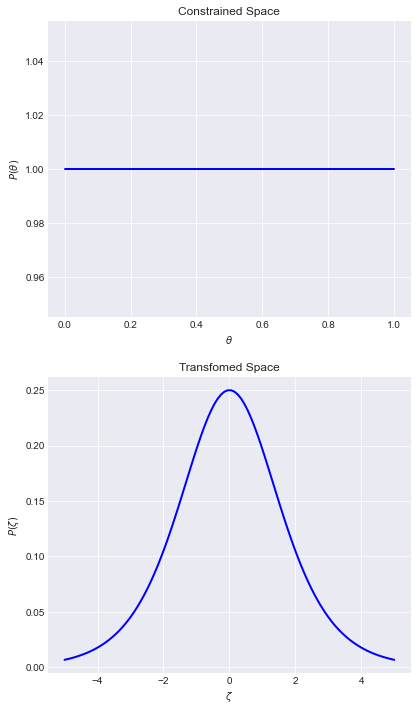

In [4]:
theta = np.linspace(0, 1, 100)
zeta = np.linspace(-5, 5, 100)

dist = uniform()
p_theta = dist.pdf(theta)
sigmoid = sp.special.expit
p_zeta = dist.pdf(sigmoid(zeta)) * sigmoid(zeta) * (1-sigmoid(zeta))

plot_transformation(theta, zeta, p_theta, p_zeta)

### Mean Field ADVI Example

Infer $\mu$ and $\sigma$ for Normal distribution.

In [5]:
# Generating data
mu = 12
sigma = 2.2
data = np.random.normal(mu, sigma, size=200)

In [6]:
# Defining the model
model = tfd.JointDistributionSequential([
    # sigma_prior
    tfd.Exponential(1, name='sigma'),                               

    # mu_prior
    tfd.Normal(loc=0, scale=10, name='mu'),

    # likelihood
    lambda mu, sigma: tfd.Normal(loc=mu, scale=sigma)
])

In [7]:
print(model.resolve_graph())

(('sigma', ()), ('mu', ()), ('x', ('mu', 'sigma')))


In [8]:
# Let's generate joint log probability
joint_log_prob = lambda *x: model.log_prob(x + (data,))

In [9]:
# Build Mean Field ADVI
def build_mf_advi():
    parameters = model.sample(1)
    parameters.pop()
    dists = []
    for i, parameter in enumerate(parameters):
        shape = parameter[0].shape
        loc = tf.Variable(
            tf.random.normal(shape, dtype=dtype),
            name=f'meanfield_{i}_loc',
            dtype=dtype
        )
        scale = tfp.util.TransformedVariable(
            tf.fill(shape, value=tf.constant(0.02, dtype=dtype)),
            tfb.Softplus(), # For positive values of scale
            name=f'meanfield_{i}_scale'
        )

        approx_parameter = tfd.Normal(loc=loc, scale=scale)
        dists.append(approx_parameter)
    return tfd.JointDistributionSequential(dists)

meanfield_advi = build_mf_advi()

TFP handles transformations differently as it transforms unconstrained space to match the support of distributions.

In [10]:
unconstraining_bijectors = [
  tfb.Exp(),
  tfb.Identity()
]

posterior = make_transformed_log_prob(
    joint_log_prob,
    unconstraining_bijectors,
    direction='forward',
    enable_bijector_caching=False
)

In [11]:
opt = tf.optimizers.Adam(learning_rate=.1)

@tf.function(autograph=False)
def run_approximation():
    elbo_loss = tfp.vi.fit_surrogate_posterior(
        posterior,
        surrogate_posterior=meanfield_advi,
        optimizer=opt,
        sample_size=200,
        num_steps=10000)
    return elbo_loss

elbo_loss = run_approximation()

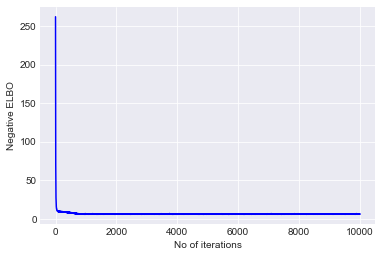

In [12]:
plt.plot(elbo_loss, color='blue')
plt.xlabel("No of iterations")
plt.ylabel("Negative ELBO")
plt.show()

In [13]:
graph_info = model.resolve_graph()
approx_param = dict()
free_param = meanfield_advi.trainable_variables
for i, (rvname, param) in enumerate(graph_info[:-1]):
    approx_param[rvname] = {"mu": free_param[i*2].numpy(),
                            "sd": free_param[i*2+1].numpy()}

In [14]:
print(approx_param)

{'sigma': {'mu': 0.82331234, 'sd': -0.6924289}, 'mu': {'mu': 11.906398, 'sd': 1.6057507}}


We got pretty good estimates of sigma and mu. We need to transform sigma via exp and I believe it will be something close to 2.2

## Drawbacks of this blog post

1. I have not used consistent notation for probability density functions (pdfs). Because I like equations handled this way.
2. Coming up with more good examples using minibatches.
3. The ADVI papers also mention Elliptical standardization and Adaptive step size for optimizers. I have not understood those sections well and thus, haven't tried to implement them.

## References

- Chapter 1 and 2: [Probabilistic Graphical Model Book]()
- Blog Post: [An Introduction to Probability and Computational Bayesian Statistics](https://ericmjl.github.io/essays-on-data-science/machine-learning/computational-bayesian-stats/) by [Ericmjl](https://github.com/ericmjl)
- Section 10.1: Variational Inference [Pattern Recognition and Machine Learning Book](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)
- Section 2.5: Transformations [Statistical Theory and Inference Book](http://www.ru.ac.bd/stat/wp-content/uploads/sites/25/2019/03/501_09_00_Olive-Statistical-Theory-and-Inference-2014.pdf)
- YouTube: [Variational Inference in Python](https://www.youtube.com/watch?v=3KGZDC3-_iY) by [Austin Rochford](https://github.com/AustinRochford)
- PyMC4: [Basic Usage Notebook](https://github.com/pymc-devs/pymc4/blob/master/notebooks/basic-usage.ipynb)
- TFP: [Joint Modelling Notebook](https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Modeling_with_JointDistribution.ipynb)
- Papers:
    - [Automatic Differentiation Variational Inference](https://arxiv.org/pdf/1603.00788.pdf). Kucukelbir, A., Tran, D., Ranganath, R., Gelman, A., and Blei, D. M. (2016).
    - [Automatic Variational Inference in Stan](https://arxiv.org/abs/1506.03431). Kucukelbir, A., Ranganath, R., Gelman, A., & Blei, D. (2015).

## Special Thanks

- Website: [codecogs.com](https://www.codecogs.com/latex/eqneditor.php) to help me generate LaTeX equations.
- Comments: [#1](https://github.com/pymc-devs/pymc4/issues/258#issue-626833042) and [#2](https://github.com/pymc-devs/pymc4/pull/246#issuecomment-632051325) by [Luciano Paz](https://github.com/lucianopaz) that cleared my all doubts regarding transformations.